In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score
import pickle
import numpy as np
import warnings
import time
warnings.filterwarnings("ignore")

In [2]:
with open('dataset-nids.pkl','rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3549974, 7), (3549974,), (508003, 7), (508003,))

Tuning best parameters

In [4]:
%%time 

param_grid = {
    "hidden_layer_sizes": [(4),(4,4),(4,3)],
    "activation":['tanh','relu'],
    "solver": ['sgd','adam'],
    "tol": [0.001, 0.0001,0.0001],
    "alpha": [0.001,0.5]
}

CPU times: total: 0 ns
Wall time: 0 ns


In [5]:
%%time
cf = MLPClassifier()
cf_cv = GridSearchCV(verbose = True,estimator=cf, param_grid=param_grid, scoring="precision", cv=5, n_jobs=-1)
cf_cv.fit(X_train, y_train)

params = cf_cv.best_params_
score = cf_cv.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 2min 15s
Wall time: 5h 19min 34s


In [6]:
print(params)
print(score)

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (4, 3), 'solver': 'adam', 'tol': 0.0001}
0.9843246994007121


Baseline

In [8]:
rna = MLPClassifier(verbose=True, activation=  'tanh', alpha = 0.001, hidden_layer_sizes = (4, 4), solver= 'adam', tol = 0.00001)

In [9]:
rna_cls = rna.fit(X_train, y_train)

Iteration 1, loss = 0.04875237
Iteration 2, loss = 0.03365432
Iteration 3, loss = 0.03294999
Iteration 4, loss = 0.03268767
Iteration 5, loss = 0.03255269
Iteration 6, loss = 0.03248964
Iteration 7, loss = 0.03242983
Iteration 8, loss = 0.03239591
Iteration 9, loss = 0.03237417
Iteration 10, loss = 0.03234021
Iteration 11, loss = 0.03231978
Iteration 12, loss = 0.03227960
Iteration 13, loss = 0.03216574
Iteration 14, loss = 0.03200456
Iteration 15, loss = 0.03184819
Iteration 16, loss = 0.03170309
Iteration 17, loss = 0.03162114
Iteration 18, loss = 0.03157661
Iteration 19, loss = 0.03155791
Iteration 20, loss = 0.03154502
Iteration 21, loss = 0.03154822
Iteration 22, loss = 0.03154280
Iteration 23, loss = 0.03153125
Iteration 24, loss = 0.03153815
Iteration 25, loss = 0.03153343
Iteration 26, loss = 0.03152159
Iteration 27, loss = 0.03152265
Iteration 28, loss = 0.03152127
Iteration 29, loss = 0.03151456
Iteration 30, loss = 0.03151821
Iteration 31, loss = 0.03151282
Iteration 32, los

In [10]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import scikitplot as skplt 
import matplotlib.pyplot as plt

Text(0, 0.5, 'Valores Reais ')

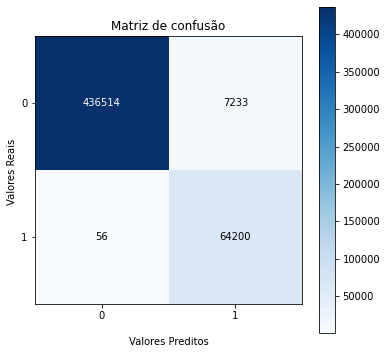

In [12]:
y_pred_opt = rna_cls.predict(X_test)
ax = skplt.metrics.plot_confusion_matrix(y_test, y_pred_opt, figsize=(6,6))
ax.set_title('Matriz de confusão')
ax.set_xlabel('\nValores Preditos')
ax.set_ylabel('Valores Reais ')

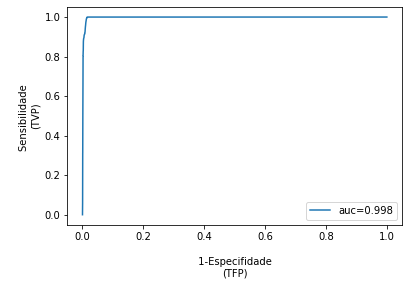

In [16]:
y_pred_proba = rna_cls.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(round(auc,4)))
plt.ylabel('\nSensibilidade \n(TVP)')
plt.xlabel('\n 1-Especifidade \n(TFP)')
plt.legend('Curva ROC')
plt.legend(loc=4)
plt.show()

Cross Validation

In [13]:
X_train = np.concatenate((X_train, X_test),axis = 0)
y_train = np.concatenate((y_train, y_test),axis = 0)

In [14]:
X_train.shape, y_train.shape

((4057977, 7), (4057977,))

In [15]:
from sklearn.model_selection import cross_validate

In [16]:
metricas = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
rna = MLPClassifier(verbose=True, activation=  'tanh', alpha = 0.001, hidden_layer_sizes = (4, 3), solver= 'adam', tol = 0.0001)

In [17]:
score = cross_validate(rna, X_train, y_train, cv = 10, scoring = metricas)

Iteration 1, loss = 0.05738411
Iteration 2, loss = 0.03489672
Iteration 3, loss = 0.03450110
Iteration 4, loss = 0.03423462
Iteration 5, loss = 0.03393558
Iteration 6, loss = 0.03372889
Iteration 7, loss = 0.03358699
Iteration 8, loss = 0.03350609
Iteration 9, loss = 0.03344344
Iteration 10, loss = 0.03337770
Iteration 11, loss = 0.03333848
Iteration 12, loss = 0.03330566
Iteration 13, loss = 0.03326977
Iteration 14, loss = 0.03324197
Iteration 15, loss = 0.03322469
Iteration 16, loss = 0.03320345
Iteration 17, loss = 0.03317851
Iteration 18, loss = 0.03316830
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.05484770
Iteration 2, loss = 0.03876680
Iteration 3, loss = 0.03440028
Iteration 4, loss = 0.03405142
Iteration 5, loss = 0.03392026
Iteration 6, loss = 0.03385711
Iteration 7, loss = 0.03382001
Iteration 8, loss = 0.03378148
Iteration 9, loss = 0.03375190
Iteration 10, loss = 0.03371495
Iteration 11, loss = 0.03368975


In [18]:
for i in score:
    print(f"-{i}:")
    print(f"-{score[i]}")
    print(f"--{np.mean(score[i])} + {np.std(score[i])} \n")

-fit_time:
-[159.43268681 137.56444025 138.99469614 135.24954748 144.2882998
 111.03862548 135.76992297 120.11578131 137.72468901 166.56562877]
--138.67443180084229 + 15.397738464377852 

-score_time:
-[0.74882436 0.73100209 0.67320085 0.72898889 0.67519188 0.74833393
 0.65986943 0.74101806 0.70683956 0.79878163]
--0.7212050676345825 + 0.04056611242940403 

-test_accuracy:
-[0.99074663 0.99097088 0.99102263 0.9913553  0.99109409 0.99047556
 0.99126659 0.99053714 0.99124932 0.99094128]
--0.9909659418547513 + 0.00028548392895694756 

-test_precision:
-[0.98138777 0.98144824 0.98190333 0.98241636 0.98138132 0.97993475
 0.98213971 0.97998337 0.98211317 0.98186407]
--0.9814572082014758 + 0.0008173960736256858 

-test_recall:
-[0.99852113 0.99896153 0.99859725 0.99880385 0.9993095  0.99945086
 0.99889629 0.99953785 0.99888541 0.99845588]
--0.9989419555595498 + 0.00036139914524517796 

-test_f1:
-[0.98988032 0.99012745 0.99017993 0.99054233 0.99026427 0.9895966
 0.99044713 0.98966403 0.990428